# Advanced AIC Final Assignment

# Part 1


Import libraries:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, mode
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
import time

## 1. Linear Regression:
Apply a linear regression model to predict household prices.
Download dataset: [Household dataset](https://drive.google.com/file/d/1z2pwvBt_5-cDZRqVaI9I8QcW8uTQT_vx/view?usp=sharing)

**Requirements**: ***Analyse*** and ***Select appropriate features*** to maximize the performance of the linear regression model. Then, use some advanced techniques to increase the performance (optional).

### Import data
The following codes import data from the household dataset.

In [2]:
house_df = pd.read_csv('house_data.csv')

In [3]:
house_df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7.0,1180.0,0.0,1955.0,0.0,98178,47.511234,-122.256775,1340.0,5650.0
1,1,6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7.0,2170.0,400.0,1951.0,1991.0,98125,47.721023,-122.318862,1690.0,7639.0
2,2,5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6.0,770.0,0.0,1933.0,0.0,98028,47.737927,-122.233196,2720.0,8062.0
3,3,2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7.0,1050.0,910.0,1965.0,0.0,98136,47.520820,-122.393185,1360.0,5000.0
4,4,1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8.0,1680.0,0.0,1987.0,0.0,98074,47.616812,-122.044901,1800.0,7503.0


In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21613 non-null  float64
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  float64
 7   sqft_lot       21613 non-null  float64
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  float64
 13  sqft_above     21613 non-null  float64
 14  sqft_basement  21613 non-null  float64
 15  yr_built       21613 non-null  float64
 16  yr_renovated   21613 non-null  float64
 17  zipcode        21613 non-null  int64  
 18  lat   

### Analyse data
In this part, you should plot graphs to analyse the relationship between features and prices, then choose appropriate features for the next step.

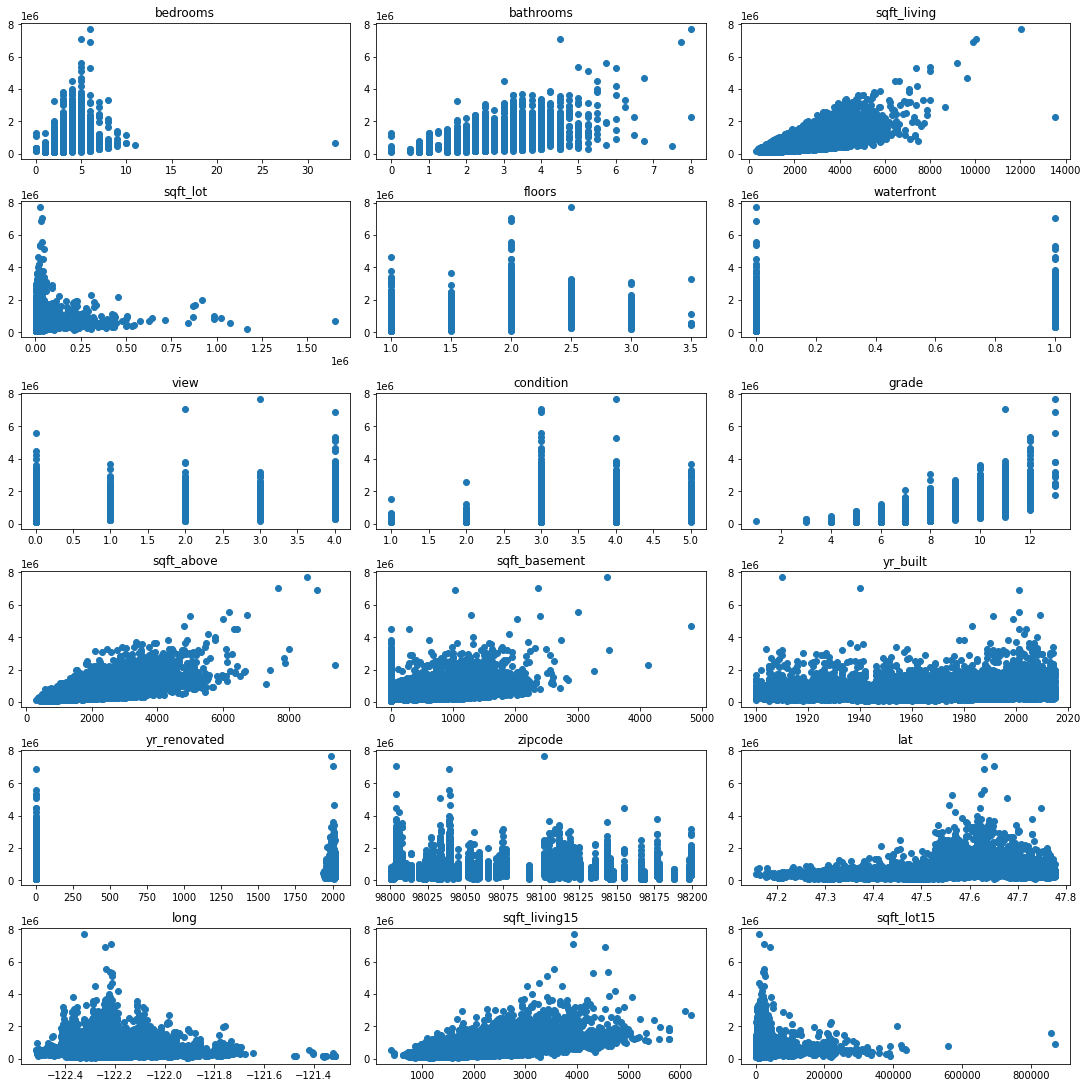

In [5]:
fig, ax = plt.subplots(6, 3, figsize=(15,15), constrained_layout=True)
for i, col in enumerate(house_df.columns[4:]):
    ax[i//3][i%3].title.set_text(col)
    ax[i//3][i%3].scatter(house_df[col], house_df['price'])

### Build and evaluate model

#### Prepare data

In [12]:
# ===Selective features===
X = house_df[['bedrooms', 'bathrooms', 'sqft_living', 'floors',
              'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15']]

# ===All features===
# X = house_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
#               'floors', 'waterfront', 'view', 'condition', 'grade',
#               'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
#               'sqft_living15', 'sqft_lot15']]
y = house_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

#### Train model

In [13]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

#### Evaluate
Use $R^2$ Score

In [14]:
print(linear_regression.score(X_test, y_test))

0.6288351251393781


#### Advanced: Add Polynomial features

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [15]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
model = model.fit(X_train, y_train)

In [16]:
print(model.score(X_test, y_test))

0.7074537193065031


## 2. Clustering and Classification:

In this problem, you should use the K-Means clustering algorithm and KNN classification algorithm.

- Complete the implementation of the kmeans function. This function takes these input parameters: X, k is the number of clusters, and maxiter the maximum number of iterations. 
- The kmeans function should return the centroids of k clusters, and the cluster of every datapoint.
- (Bonus point) Save the centroids positions after each iteration.

### Prepare input parameters:
The following codes prepares input parameters for the K-Means algorithm and visualize data via graphs.

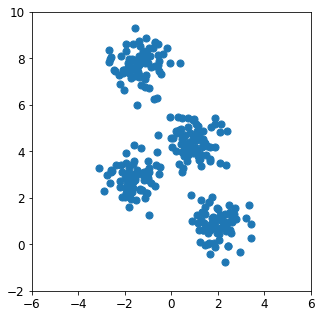

In [17]:
# Param configurations
Nb_cluster =  4
numIterations = 100
X, y = make_blobs(n_samples = 300, centers = 4,
                  random_state = 0, cluster_std = 0.6)

data = X

# change default figure and font size
plt.rcParams['figure.figsize'] = 5, 6 
plt.rcParams['font.size'] = 12

# scatter plot
plt.scatter(X[:, 0], X[:, 1], s = 50)
plt.ylim(-2, 10)
plt.xlim(-6, 6)
plt.gca().set_aspect('equal')
plt.show()

### The kmeans function implement the K-Means algorithm

In [18]:
def kmeans(X, k, maxiter, seed=None):
    """
    number of clusters k and maximum number of iterations maxiter
    """
    
    num_rows, num_cols = X.shape
    
    # centroids history
    cen_hist = []
    
    # Choose k random datapoints to become centroids
    if seed is not None:
        np.random.seed(seed)
    rand_indices = np.random.choice(num_rows, size = k)
    centroids = X[rand_indices]

    for itr in range(maxiter):
        # ---------------
        # Assign step
        # ---------------
        # Calculate the distance matrix between datapoints and centroids
        
        distance_matrix = pairwise_distances(X, centroids)
        
        # Assign each datapoint to the closest cluster centroid
        cluster_assignment = np.argmin(distance_matrix, axis=1)

        # Update step
        # Calculate the mean of each cluster to become the new centroids.
        new_centroids = []
        for i in range(k):
            current_cluster = X[cluster_assignment == i]
            new_centroids.append(current_cluster.mean(axis = 0))
            
        new_centroids = np.array(new_centroids)

        cen_hist.append(new_centroids)

        # Stop condition
        # If all centroids' positions didn't change after an iteration then break
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    cen_hist = np.array(cen_hist)
    return centroids, cluster_assignment, cen_hist

### Visualize the result of K-Means algorithm.

In [19]:
def plot_kmeans(data, labels, centroids, centroids_Hist=None):
    '''    
    Arguments:
    data             --- input data
    labels           --- labels for each datapoint
    centroids        --- centroids of each cluster
    centroids_Hist   --- centroids coordinates after each iteration
    
    '''
    
    # configure figure
    plt.rcParams['figure.figsize'] = 15, 6 
    plt.rcParams['font.size'] = 12
    xmin = min(X[:,0])
    xmax = max(X[:,0])
    ymin = min(X[:,1])
    ymax = max(X[:,1])
    
    plt.ylim(ymin - 1, ymax + 1)
    plt.xlim(xmin - 1, xmax + 1)
    plt.gca().set_aspect('equal')
    
    # draw scatter plot
    plt.scatter(data[:,0], data[:,1], c = labels)
    plt.scatter(centroids[:,0], centroids[:,1], c = 'r', marker='^', s=200)
    if centroids_Hist is not None:
        for i in range(len(centroids)):
            plt.plot(centroids_Hist[:,i,0], centroids_Hist[:,i,1], c = 'b', marker=">")

### Apply K-Means algorithm

Các điểm trung tâm thuật toán K-Means tìm được cho trường hợp 1: 
 [[ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]
 [ 1.98258281  0.86771314]]
Các điểm trung tâm thuật toán K-Means tìm được cho trường hợp 2: 
 [[ 0.94973532  4.41906906]
 [-1.58438467  2.83081263]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]]


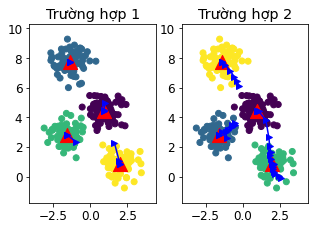

In [20]:
# Run 2 random test
for i in range(1,3):
    # Apply K-Means algorithm to the input dataset
    centers, labels, centers_Hist = kmeans(data, Nb_cluster, numIterations)
    print('Các điểm trung tâm thuật toán K-Means tìm được cho trường hợp {0}: \n'.format(i),  centers)
    # Plot the result
    plt.subplot(1,2,i)
    plt.title('Trường hợp {0}'.format(i))
    plot_kmeans(data, labels, centers, centers_Hist)

## k nearest neighbors - KNN:

After runnig the k-means algorithm successfully, all datapoints have been clustered.

With a new unlabeled random datapoint, find its cluster using the k nearest neighbors algorithm with k=5.

0


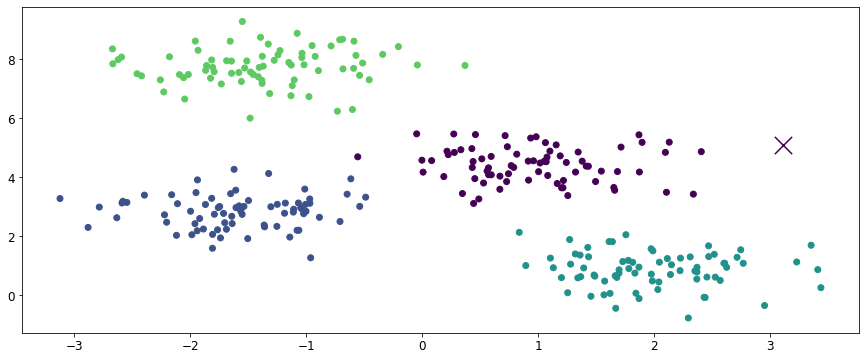

In [22]:
# Generate a random point
x = np.random.rand()*8 - 4 # [-4; 4)
y = np.random.rand()*12 - 2 # [-2; 10)
point = [x, y]

# KNN algorithm
k = 5
distances = np.linalg.norm(data - point, axis=1)
k_nearest_neighbors = distances.argsort()[:k]
neighbors_clusters = labels[k_nearest_neighbors]
prediction = mode(neighbors_clusters)[0][0]
print(prediction)
plt.scatter(data[:,0], data[:,1], c = labels, vmin=0, vmax=4)
plt.scatter(x, y, c=prediction, marker='x', s=300,  vmin=0, vmax=4, linewidths=5)
plt.show()

## 3. Deep Learning:

In this problem, you should describe a computer vision problem that you have learned. Then, you have to suggest a deep learning model and build it with your selected dataset.

### Problem
Build a handwriting digit recognition model with pytorch, using the MNIST dataset.

### Import libraries

In [23]:
import torch
import torchvision
from torchvision.transforms import ToTensor

### Prepare data

In [24]:
data_train = torchvision.datasets.MNIST('./data', download=True, train=True, transform=ToTensor())
data_test = torchvision.datasets.MNIST('./data', download=True, train=False, transform=ToTensor())

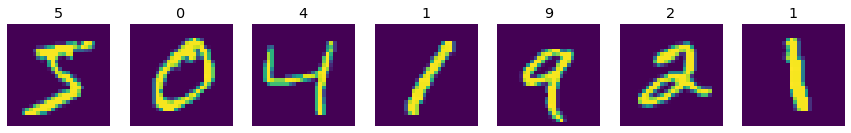

In [25]:
fig, ax = plt.subplots(1,7)
for i in range(7):
    ax[i].imshow(data_train[i][0].view(28,28))
    ax[i].set_title(data_train[i][1])
    ax[i].axis('off')

In [26]:
print('Training samples:', len(data_train))
print('Test samples:', len(data_test))

Training samples: 60000
Test samples: 10000


In [27]:
train_loader = torch.utils.data.DataLoader(data_train, batch_size=64)
test_loader = torch.utils.data.DataLoader(data_test, batch_size=64)

### Design the model
- Flatten: Convert 28x28 image into 1 28x28 nodes layer.
- 2 linear layers with 1 layer ReLU between.
- LogSoftmax: normalize output to the range (0; 1)

In [28]:
network = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(28*28, 100),
        torch.nn.ReLU(),
        torch.nn.Linear(100, 10),
        torch.nn.LogSoftmax(dim=0))

### Train the model
Batch-training the model
1. Load each batch from the training set
1. Optimize on each batch using the `Adam` algorithm from pytorch library
1. Repeat until the end of the training set for each epoch

#### Train function for 1 epoch

In [29]:
def train_epoch(network, dataloader, learning_rate=0.01, optimizer=None, loss_fn=torch.nn.NLLLoss()):
    optimizer = optimizer or torch.optim.Adam(network.parameters(),lr=learning_rate)

    # Chuyển network về train mode
    network.train()

    total_loss, accuracy, count = 0, 0, 0

    # Train theo từng batch
    for features, labels in dataloader:
        optimizer.zero_grad()

        # Dự đoán với mô hình hiện tại
        prediction = network(features)

        # Tính loss
        loss = loss_fn(prediction, labels)
        loss.backward()

        # Thực hiện optimize loss sử dụng optimizer Adam hoặc optimizer được truyền vào tham số
        optimizer.step()

        # Cập nhật các biến theo dõi
        total_loss += loss
        _, predicted = torch.max(prediction, 1)
        accuracy += (predicted == labels).sum()
        count += len(labels)

    # Hàm trả về loss trung bình và accuracy trung bình
    return total_loss.item()/count, accuracy.item()/count

#### Validate function
Use to evaluate each epoch

In [30]:
def validate(network, dataloader, loss_fn=torch.nn.NLLLoss()):
    # Chuyển network về eval mode
    network.eval()
    loss, accuracy, count = 0, 0, 0
    with torch.no_grad():
        # Eval với từng batch
        for features, labels in dataloader:
            # Dự đoán với mô hình hiện tại
            prediction = network(features)

            # Tính loss
            loss += loss_fn(prediction, labels)

            # Tính accuracy
            pred = torch.max(prediction,1)[1]
            accuracy += (pred == labels).sum()
            count += len(labels)
    # Hàm trả về loss trung bình và accuracy trung bình
    return loss.item()/count, accuracy.item()/count

#### Train function

In [31]:
def train(network, train_loader, test_loader, optimizer=None, learning_rate=0.01, epochs=10, loss_fn=torch.nn.NLLLoss()):
    # Sử dụng optimizer được pass vào (nếu có) hoặc Adam optimizer
    optimizer = optimizer or torch.optim.Adam(network.parameters(), lr=learning_rate)

    # Khởi tạo biến theo dõi quá trình train
    hist = { 'train_loss' : [], 'train_accuracy': [], 'val_loss': [], 'val_accuracy': []}

    # Train từng epoch
    for epoch in range(epochs):
        # Train 1 epoch, nhận về loss và accuracy sau epoch
        t_loss, t_acc = train_epoch(network, train_loader, optimizer=optimizer, learning_rate=learning_rate, loss_fn=loss_fn)
        # Validate với test set
        v_loss, v_acc = validate(network, test_loader, loss_fn=loss_fn)
        print(f"Epoch {epoch:2}: Train accuracy={t_acc:.3f}, Val accuracy={v_acc:.3f}, Train loss={t_loss:.3f}, Val loss={v_loss:.3f}")
        hist['train_loss'].append(t_loss)
        hist['train_accuracy'].append(t_acc)
        hist['val_loss'].append(v_loss)
        hist['val_accuracy'].append(v_acc)

    # Trả về biến theo dõi quá trình
    return hist

#### Training

In [32]:
hist = train(network, train_loader, test_loader, epochs=10)

Epoch  0: Train accuracy=0.927, Val accuracy=0.944, Train loss=0.035, Val loss=0.034
Epoch  1: Train accuracy=0.952, Val accuracy=0.949, Train loss=0.033, Val loss=0.033
Epoch  2: Train accuracy=0.959, Val accuracy=0.950, Train loss=0.033, Val loss=0.034
Epoch  3: Train accuracy=0.960, Val accuracy=0.956, Train loss=0.033, Val loss=0.033
Epoch  4: Train accuracy=0.963, Val accuracy=0.955, Train loss=0.033, Val loss=0.033
Epoch  5: Train accuracy=0.963, Val accuracy=0.957, Train loss=0.033, Val loss=0.033
Epoch  6: Train accuracy=0.964, Val accuracy=0.954, Train loss=0.032, Val loss=0.034
Epoch  7: Train accuracy=0.964, Val accuracy=0.957, Train loss=0.033, Val loss=0.034
Epoch  8: Train accuracy=0.965, Val accuracy=0.949, Train loss=0.032, Val loss=0.034
Epoch  9: Train accuracy=0.966, Val accuracy=0.958, Train loss=0.032, Val loss=0.034


### Evaluating

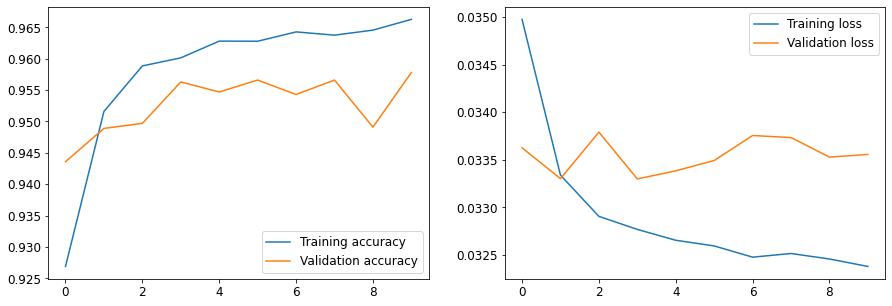

In [33]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(hist['train_accuracy'], label='Training accuracy')
plt.plot(hist['val_accuracy'], label='Validation accuracy')
plt.legend()

plt.subplot(122)
plt.plot(hist['train_loss'], label='Training loss')
plt.plot(hist['val_loss'], label='Validation loss')
plt.legend()

### Predict with new data

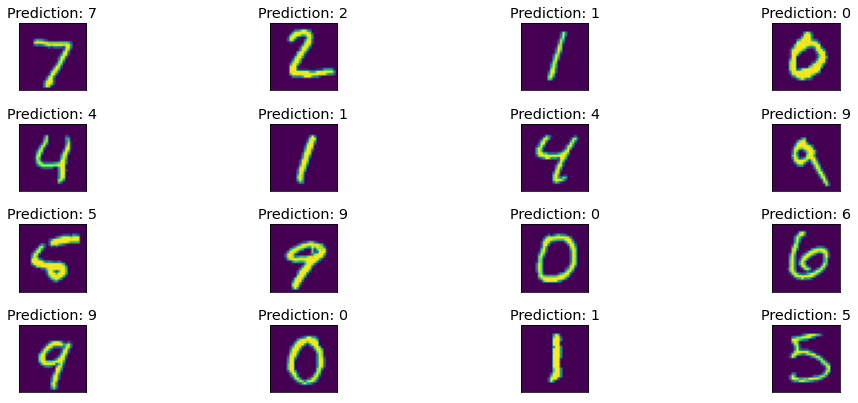

In [34]:
# Lấy dữ liệu từ batch đầu tiên trong test set
preview_data = next(enumerate(test_loader))[1]

# Dự đoán
output = network(preview_data[0])

# Plot kết quả
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  plt.imshow(preview_data[0][i][0])
  plt.title(f"Prediction: {output.data.max(1)[1][i].item()}")
  plt.xticks([])
  plt.yticks([])

## References:
- https://docs.microsoft.com/en-us/learn/modules/intro-computer-vision-pytorch/3-train-dense-neural-networks
- https://docs.microsoft.com/en-us/learn/modules/intro-computer-vision-pytorch/4-multilayer-dense-neural-networks